In [1]:
# for autoreloading edited the modules and packages instead of restarting the kernel
%reload_ext autoreload
%autoreload 2

## Data Processing

### 1. loading the data

In [2]:
from pathlib import Path
import pandas as pd


In [3]:
data = (
    Path("data_preprocess") / "raw_data" / "kickstarter_2021" / "kickstarter_2021.csv"
)
df = pd.read_csv(data)


### 2. cleaning the data

In [4]:
import numpy as np
from data_preprocess.data_utils import get_cleaned_ico_df

In [5]:
remained_rows = []
remained_cols = []
max_allowed_col_nan_list = []
important_columns = []
for max_allowed_col_nan in np.linspace(0.01, 0.1, 100):
    to_drop_features = ["usd_pledged"]
    target_feature = "usd_pledged"
    rows, cols = get_cleaned_ico_df(
        df, max_allowed_col_nan,
        important_columns=important_columns,
    ).shape
    remained_rows.append(rows / df.shape[0])
    remained_cols.append(cols / df.shape[1])
    max_allowed_col_nan_list.append(max_allowed_col_nan)


In [6]:
import matplotlib.pyplot as plt


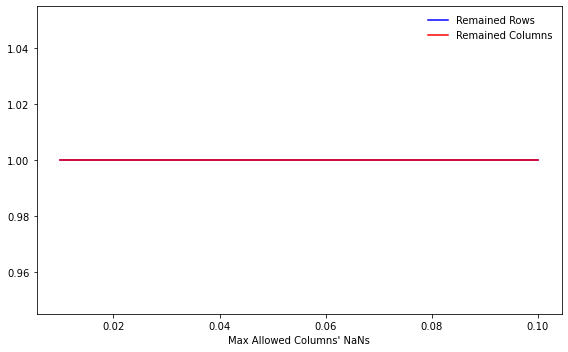

In [7]:
plt.figure(facecolor="white", figsize=(8, 5))
plt.plot(max_allowed_col_nan_list, remained_rows, color="blue", label="Remained Rows")
plt.plot(max_allowed_col_nan_list, remained_cols, color="red", label="Remained Columns")
plt.xlabel("Max Allowed Columns' NaNs")
plt.legend(frameon=False)
plt.tight_layout()
# plt.savefig("max_allowed_columns_nans.png")
plt.show()

In [8]:
cleaned_df = get_cleaned_ico_df(df, 0.0475, important_columns=important_columns)
cleaned_df.to_csv(Path("data_preprocess") / 'cleaned_kickstarter_dataset.csv', index=False)

### 3. correlation matrix

In [9]:
from IPython.core.display import HTML, display


In [12]:
drop_cols = ['disable_communication']
correlation_matrix = cleaned_df.drop(columns=drop_cols).corr()
correlation_matrix_html = correlation_matrix.style.background_gradient(cmap='BuGn').to_html()
with open(Path("data_preprocess") / "kick_starter_correlation_matrix.html", 'w') as file:
    file.write(correlation_matrix_html)
display(HTML(correlation_matrix_html))

,launched_at,backers_count,usd_pledged,goal,is_starrable,spotlight,deadline,id,state_changed_at,staff_pick,created_at
launched_at,1.000000,0.042611,0.038399,0.006253,0.442917,-0.107898,0.999916,-0.002510,0.999885,-0.015654,0.989031
backers_count,0.042611,1.000000,0.792286,0.019496,0.004487,0.119980,0.042517,0.000236,0.042868,0.162328,0.038462
usd_pledged,0.038399,0.792286,1.000000,0.017812,0.007376,0.095370,0.038516,-0.000579,0.038756,0.144366,0.034778
goal,0.006253,0.019496,0.017812,1.000000,0.000699,-0.032326,0.006681,0.000935,0.006528,-0.004474,0.006008
is_starrable,0.442917,0.004487,0.007376,0.000699,1.000000,-0.283068,0.443646,-0.000531,0.435955,0.004900,0.436994
spotlight,-0.107898,0.119980,0.095370,-0.032326,-0.283068,1.000000,-0.110243,0.000766,-0.106830,0.243579,-0.111070
deadline,0.999916,0.042517,0.038516,0.006681,0.443646,-0.110243,1.000000,-0.002497,0.999939,-0.016176,0.988916
id,-0.002510,0.000236,-0.000579,0.000935,-0.000531,0.000766,-0.002497,1.000000,-0.002495,0.001361,-0.002995
state_changed_at,0.999885,0.042868,0.038756,0.006528,0.435955,-0.106830,0.999939,-0.002495,1.000000,-0.015843,0.988878
staff_pick,-0.015654,0.162328,0.144366,-0.004474,0.004900,0.243579,-0.016176,0.001361,-0.015843,1.000000,-0.022598
